In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts

/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [17]:
price = pd.read_csv('price.csv',index_col = 'Date')
vol = pd.read_csv('volume.csv',index_col = 'Date')

In [3]:
def cointegrated_pairs(data):
    n =  (len(data.columns) -1)
    stocks = data.iloc[:,1:].columns.values #pulls all stock names 
    data = data.to_numpy()
    pvalue_matrix = np.zeros((n,n),dtype = float)
    pairs = np.empty((n*n,2),dtype=object)
    m = 0
    #loop through all possilbe combintions of stocks ie 3!=6
    for i in range(0,n):
        for j in range(0,n):
            S1 = data[:,i+1]
            S2 = data[:,j+1]
            result = ts.coint(S1,S2)
            pvalue_matrix[i,j] = result[1]
            #storing all paris in matrix form
            if (result[1] < 0.05) & (i!=j):
                pairs[m,0] = stocks[i]
                pairs[m,1] = stocks[j] 
                m = m +1
    return pvalue_matrix,  pairs

In [18]:
price = price.fillna(method = 'ffill')
price = price.fillna(method = 'bfill')

### Clustering 

In [19]:
price

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015/1/2,132.667343,25.163288,38.961033,47.901787,37.310001,78.362656,19.055651,42.047756,72.339996,71.022949,...,29.139332,118.013245,129.636993,29.513472,34.689079,45.366924,77.430000,103.273209,24.978090,41.283794
2015/1/5,129.675278,24.723013,38.969719,47.000313,37.070000,77.039558,18.790598,40.592834,71.980003,70.971771,...,27.985886,117.165565,127.430626,29.178459,32.530121,44.445164,76.339996,107.125671,24.042185,41.035954
2015/1/6,128.292496,24.520849,38.527172,46.767677,36.130001,76.483856,18.440342,39.792610,70.529999,70.383423,...,27.605684,116.582779,124.712402,29.333715,32.338821,43.899631,75.790001,106.217575,23.123941,40.635601
2015/1/7,129.222488,24.700550,38.839546,48.657864,37.279999,78.089226,18.042759,40.390747,71.110001,70.997375,...,27.457478,118.251656,128.374954,29.587006,32.593887,45.354382,77.720001,108.859299,23.344675,41.474419
2015/1/8,132.319641,25.342993,39.637856,49.166756,38.959999,79.280006,18.222620,39.800694,72.919998,72.626076,...,27.721682,119.602646,129.919449,29.930189,32.839859,46.144466,79.379997,110.015007,23.671360,42.113091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/3/25,150.460007,66.970001,118.477776,159.970398,318.880005,326.737091,79.129646,93.489998,431.619995,219.039993,...,33.880001,237.990005,80.269997,70.699997,86.690002,119.620003,425.660004,125.279999,71.080002,189.429993
2022/3/28,149.470001,66.660004,119.513649,160.605011,321.809998,329.758087,79.537224,92.349998,450.010010,220.649994,...,33.299999,240.850006,80.129997,71.239998,86.849998,121.190002,422.279999,125.680000,69.730003,189.369995
2022/3/29,152.080002,67.480003,119.712860,160.813232,331.500000,339.678558,80.272850,87.839996,466.329987,224.949997,...,33.439999,243.389999,81.750000,71.830002,89.269997,122.220001,438.100006,129.580002,69.739998,192.279999


In [20]:
price.shape

(1825, 478)

In [23]:
returns = price.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = price.pct_change().std()*np.sqrt(252)

data = returns
data.head()

,returns,volatility
MMM,0.042356,0.229220
AOS,0.164991,0.269245
ABT,0.182808,0.243760
ABBV,0.207101,0.280948
ABMD,0.404416,0.449011


In [24]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

,returns,volatility
MMM,-1.368166,-1.007847
AOS,-0.111555,-0.546786
ABT,0.071006,-0.840350
ABBV,0.319936,-0.411974
ABMD,2.341771,1.524009


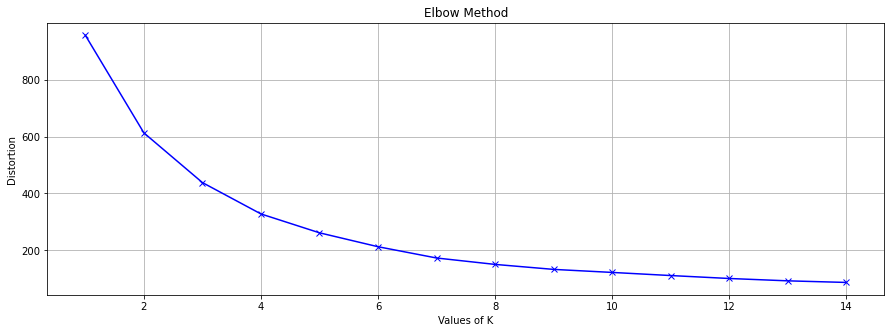

In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [27]:
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

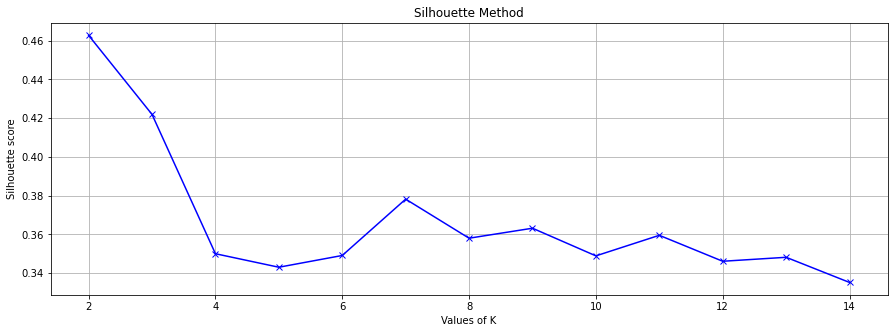

Suggested number of clusters:  4


In [28]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)


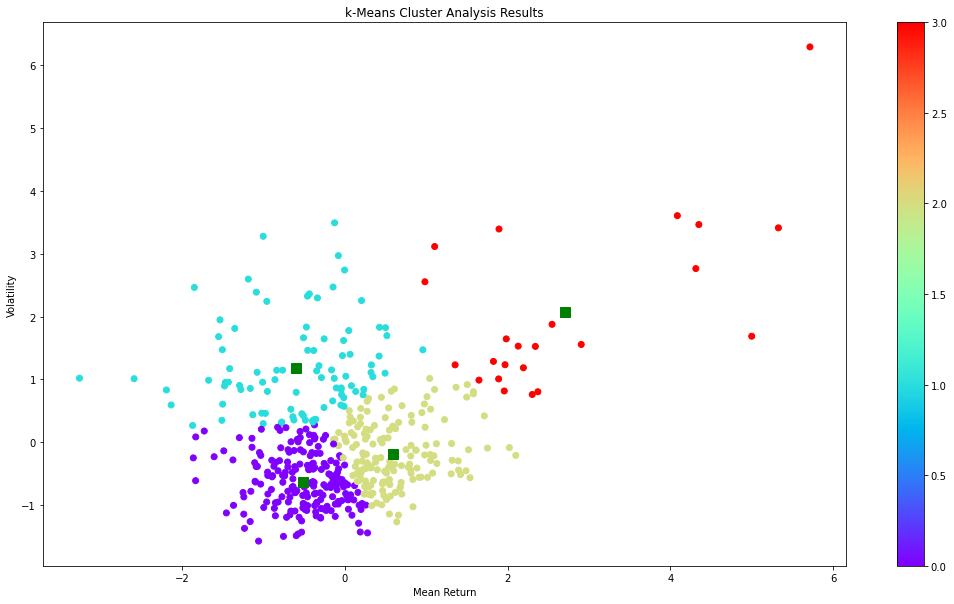

In [29]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

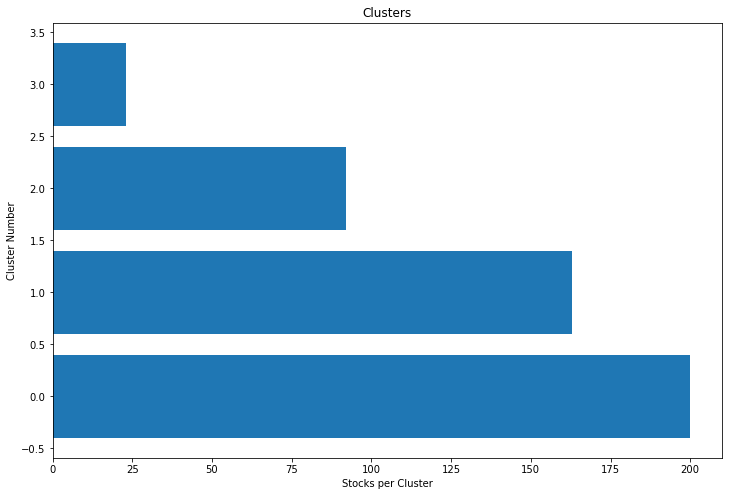

In [30]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [37]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 75084


In [83]:
ticker = clustered_series[clustered_series == 1].index

In [77]:
enumerate(ticker_count.index)

In [82]:
clustered_series.value_counts()

0    200
2    163
1     92
3     23
dtype: int64

In [84]:
pvalue_matrix, pairs = cointegrated_pairs(price[ticker])

/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWa

/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWa

/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWa

In [87]:
pairs

array([['ALK', 'PARA'],
       ['ALK', 'VRTX'],
       ['AAL', 'CCL'],
       ...,
       [None, None],
       [None, None],
       [None, None]], dtype=object)

In [68]:
ticker_count

0    200
2    163
1     92
3     23
dtype: int64

In [58]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
A,0.293138,-0.715914
AAL,-1.849643,2.463667
AAP,-0.796604,0.185703
AAPL,1.394039,-0.300377
ABBV,0.319936,-0.411974
